**Assignment 1, Due 9/26**

## About
In this assignment, you will gain experience implementing a linear model, a neural network, and a deep neural network using TensorFlow 2.0. 

* You will use two different development styles. I thought it’d be helpful for you to see both of these early (if you’re familiar with them, you can branch out to any major framework that exist today). 

* Along the way, you'll add code to visualize the weights of a linear model, and provide your own implementation of softmax (so you learn to extend the built-in functionality right off the bat).

This assignment has several parts, plan ahead and get started early (and come to office hours if you’re stuck, the TAs and I are happy to help). Most concepts will be covered in lecture two, just posting it early.

## Instructions

Complete the code in this notebook by searching for the text **"TODO"**.

## Submission instructions

Please submit this assignment on CourseWorks by uploading a Jupyter notebook that includes saved output. If you are working in Colab, you can prepare your notebook for submission by ensuring that runs end-to-end, then saving and downloading it:

1. ```Runtime -> Restart and run all```
1. ```File -> Save```
1. ```File -> Download.ipynb```

## Resources

You can find all the latest tutorials for TensorFlow 2.0 [here](https://www.tensorflow.org/beta). Code examples that will help you with each part of the assignment are linked below.



---



## Setup

### Install TensorFlow 2.0

If you are running this notebook in Colab, the magic command below will install the most recent version. If you prefer working in Jupyter locally, you will need to install TensorFlow 2.0 on your system, using ```!pip install tensorflow==2.0.0-rc0```.

In [1]:
try:
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

TensorFlow 2.x selected.


### Check which TF version is installed
TensorFlow 2.0 is currently under development. It's good practice to check which version you have installed. All the code you'll write in this course will be for version 2.0 (currently in beta).

In [0]:
import tensorflow as tf
import numpy as np
print(tf.__version__)
assert tf.__version__.startswith('2')

2.0.0-rc1


In [0]:
from tensorflow.keras.layers import Dense, Flatten 
from tensorflow.keras import Model
import matplotlib.pyplot as plt

## Part 1: First steps with Sequential models

You will work with the Sequential API in this section. This is the easiest way to develop models with TF 2.0, and is the most common in practice. 

Here are a few code examples that will help you with this part of the assignment:

* [Get started for beginners](https://www.tensorflow.org/beta/tutorials/quickstart/beginner)
* [Classify images](https://www.tensorflow.org/beta/tutorials/keras/basic_classification)
* [Explore overfitting and underfitting](https://www.tensorflow.org/beta/tutorials/keras/overfit_and_underfit)

### Download and prepare a dataset

In [0]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11493376/11490434 [==============================] - 0s 0us/step


### Define, train, and evaluate a linear model

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=5)
model.evaluate(x_test, y_test)

Train on 60000 samples
Epoch 1/5
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4685 - accuracy: 0.8762
Epoch 2/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.3038 - accuracy: 0.9149
Epoch 3/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2830 - accuracy: 0.9210
Epoch 4/5
60000/60000 [==============================] - 5s 85us/sample - loss: 0.2730 - accuracy: 0.9243
Epoch 5/5
60000/60000 [==============================] - 5s 84us/sample - loss: 0.2667 - accuracy: 0.9257
10000/1 [=====================================================================================================================================================================================================================================================================================================================================================================================================================================================

[0.26969051356017587, 0.9246]

### 1a: Plot loss and accuracy

**TODO**

Modify the code below to produce plots showing loss and accuracy as a function of epochs on training and validation data (it's fine to use x_test and y_test as validation data for this assignment). To do so, you will need to add validation data to the call for ```model.fit```, and capture the results in a history object. Code for plotting is provided for you, you can pass your history object to this.

![Plot 1](https://storage.googleapis.com/applied-dl/im/a1-1.png)
![Plot 2](https://storage.googleapis.com/applied-dl/im/a1-2.png)


Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 104us/sample - loss: 0.4617 - accuracy: 0.8801 - val_loss: 0.3101 - val_accuracy: 0.9149
Epoch 2/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.3039 - accuracy: 0.9148 - val_loss: 0.2821 - val_accuracy: 0.9216
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.2836 - accuracy: 0.9206 - val_loss: 0.2739 - val_accuracy: 0.9245
Epoch 4/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2731 - accuracy: 0.9231 - val_loss: 0.2732 - val_accuracy: 0.9230
Epoch 5/10
60000/60000 [==============================] - 6s 100us/sample - loss: 0.2669 - accuracy: 0.9256 - val_loss: 0.2670 - val_accuracy: 0.9273
Epoch 6/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.2622 - accuracy: 0.9273 - val_loss: 0.2681 - val_accuracy: 0.9269
Epoch 7/10
60000/60000 [============================

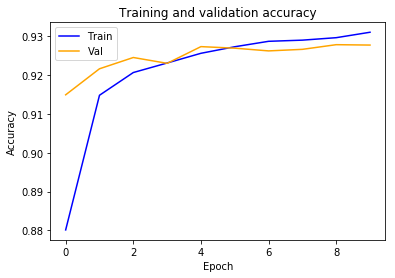

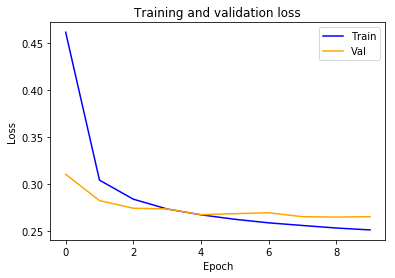

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


# 1. create a history object to store the results of model.fit
# ```history = model.fit(...)```
# 2. add another parameter to model.fit for validation data
# https://keras.io/models/sequential/

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()
  
plot(history)

### 1b: Implement a neural network 

**TODO**

Modify the code below to create a neural network (with a single hidden layer). Add a Dense layer with 128 units and ReLU activation. Train and evaluate your model. How does the accuracy compare with the linear model above? It is not necessary to produce plots for this section.

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2673 - accuracy: 0.9233 - val_loss: 0.1325 - val_accuracy: 0.9613
Epoch 2/10
60000/60000 [==============================] - 6s 107us/sample - loss: 0.1185 - accuracy: 0.9660 - val_loss: 0.0996 - val_accuracy: 0.9695
Epoch 3/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0819 - accuracy: 0.9752 - val_loss: 0.0837 - val_accuracy: 0.9739
Epoch 4/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0597 - accuracy: 0.9816 - val_loss: 0.0808 - val_accuracy: 0.9756
Epoch 5/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0471 - accuracy: 0.9856 - val_loss: 0.0809 - val_accuracy: 0.9754
Epoch 6/10
60000/60000 [==============================] - 6s 106us/sample - loss: 0.0369 - accuracy: 0.9882 - val_loss: 0.0741 - val_accuracy: 0.9757
Epoch 7/10
60000/60000 [==========================

[0.0789281122888191, 0.9797]

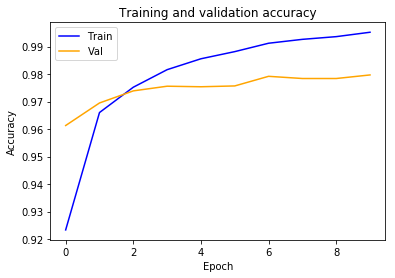

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# model.fit(x_train, y_train, epochs=5)
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))


# A plotting function you can reuse
def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()
  
plot(history)
model.evaluate(x_test, y_test)

Answer: 
By adding a dense layer, the accuracy increased from **0.93 to 0.99**

### 1c: Implement a deep neural network 

**TODO**

Modify the code below to create and train a deep neural network with at least two hidden layers.

In [0]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 6s 108us/sample - loss: 0.2416 - accuracy: 0.9296
Epoch 2/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.1017 - accuracy: 0.9686
Epoch 3/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0709 - accuracy: 0.9779
Epoch 4/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0543 - accuracy: 0.9829
Epoch 5/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0435 - accuracy: 0.9859
Epoch 6/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0354 - accuracy: 0.9886
Epoch 7/10
60000/60000 [==============================] - 6s 99us/sample - loss: 0.0276 - accuracy: 0.9909
Epoch 8/10
60000/60000 [==============================] - 6s 98us/sample - loss: 0.0239 - accuracy: 0.9920
Epoch 9/10
60000/60000 [==============================] - 6s 105us/sample - loss: 0.0220 - accuracy: 0.9927
Epoch 10/10


### 1d: Display predictions and their confidence 

**TODO**

1. Choose one of your models above. Use it to make predictions on the entire test set using ```model.predict```

2. Next, identify one image from the testing set the model classifies correctly, and another that it classifies incorrectly. Add code to display these images below, the correct labels, the predicted labels, and the confidence scores.

Train on 60000 samples, validate on 10000 samples
Epoch 1/13
60000/60000 [==============================] - 3s 44us/sample - loss: 0.3362 - accuracy: 0.9055 - val_loss: 0.1543 - val_accuracy: 0.9546
Epoch 2/13
60000/60000 [==============================] - 2s 35us/sample - loss: 0.1346 - accuracy: 0.9615 - val_loss: 0.1256 - val_accuracy: 0.9624
Epoch 3/13
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0939 - accuracy: 0.9721 - val_loss: 0.0884 - val_accuracy: 0.9726
Epoch 4/13
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0703 - accuracy: 0.9793 - val_loss: 0.0901 - val_accuracy: 0.9716
Epoch 5/13
60000/60000 [==============================] - 2s 36us/sample - loss: 0.0555 - accuracy: 0.9836 - val_loss: 0.0750 - val_accuracy: 0.9762
Epoch 6/13
60000/60000 [==============================] - 2s 35us/sample - loss: 0.0457 - accuracy: 0.9867 - val_loss: 0.0820 - val_accuracy: 0.9755
Epoch 7/13
60000/60000 [==============================] 

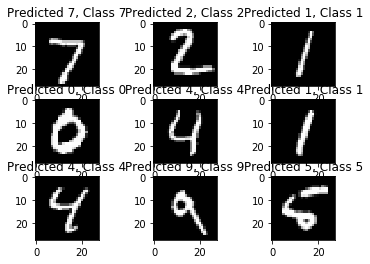

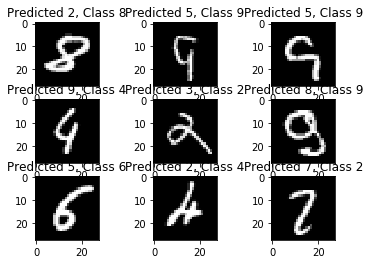

In [0]:
# TODO: add your code here.

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(64, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(x_train, y_train,
          batch_size=128, epochs=13,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test,
                        verbose=0)
print('Test score:', score[0])
print('Test accuracy:', score[1])
predicted_classes = model.predict_classes(x_test)
correct_indices = np.nonzero(predicted_classes == y_test)[0]
incorrect_indices = np.nonzero(predicted_classes != y_test)[0]

plt.figure()
for i, correct in enumerate(correct_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[correct].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[correct], y_test[correct]))
    
plt.figure()
for i, incorrect in enumerate(incorrect_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[incorrect].reshape(28,28), cmap='gray', interpolation='none')
    plt.title("Predicted {}, Class {}".format(predicted_classes[incorrect], y_test[incorrect]))

## Part 2: Subclassed models

In this part of the assignment, you'll work with the Keras Subclassing API. Instead of using a built-in method (```model.fit```) you will train models using a GradientTape.

Here are a few code examples that will help you with this part of the assignment:

* [Get started for experts](https://www.tensorflow.org/beta/tutorials/quickstart/advanced)
* [Tensors and operations](https://www.tensorflow.org/beta/tutorials/eager/basics)
* [Keras overview](https://www.tensorflow.org/beta/guide/keras/overview)

### Download and prepare a dataset
This is similar to the above, except now we'll use ```tf.data``` to batch and shuffle the data, instead of the utilities baked into ```model.fit```. It's not necessary for this assignment, but if you wish, you can learn how to use tf.data [here](https://www.tensorflow.org/beta/tutorials/load_data/images).

In [0]:
# Download a dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Batch and shuffle the data
train_ds = tf.data.Dataset.from_tensor_slices(
    (x_train.astype('float32') / 255, y_train)).shuffle(1024).batch(32)

test_ds = tf.data.Dataset.from_tensor_slices(
    (x_test.astype('float32') / 255, y_test)).batch(32)

tf.Tensor(2, shape=(), dtype=uint8)


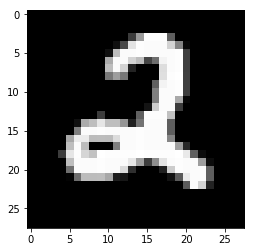

In [0]:
# A quick example of iterating over a dataset object
for image, label in train_ds.take(1):
  plt.imshow(image[0], plt.get_cmap('gray'))
  print(label[0])

### Define and train a linear model

You may see some warnings running the below code (that's okay, just a matter of TF 2.0 being under active development).

In [0]:
class MyLinearModel(Model):
  def __init__(self):
    super(MyLinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax', name="dense1")

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)

In [0]:
model = MyLinearModel()

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

# For each epoch
for epoch in range(5):

  # For each batch of images and labels
  for images, labels in train_ds:

    # Open a GradientTape.
    with tf.GradientTape() as tape:

      # Forward pass
      predictions = model(images)


      # Calculate loss
      loss = loss_fn(labels, predictions)
      
    # Backprop to calculate gradients
    gradients = tape.gradient(loss, model.trainable_variables)

    # Gradient descent step
    optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  print("Epoch {}, Loss: {}".format(epoch, loss))

Epoch 0, Loss: 0.150179922580719
Epoch 1, Loss: 0.2928884029388428
Epoch 2, Loss: 0.11049442738294601
Epoch 3, Loss: 0.31842923164367676
Epoch 4, Loss: 0.045724090188741684


Note: you may have noticed that the above code runs slowly (it's executing eagerly). Later in this notebook, you will compile your code (to run it in graph mode) using ```@tf.function```. The general workflow is to write your code without using tf.function (as shown above, which makes for easier debugging). Once you've finished debugging your model, you can add ```@tf.function``` for performance if necessary.

### 2a: Visualize the learned weights

We can interpret a linear model by looking at the weights of the fully connected layer. Modify the below code to create a plot similar to the following:

![Plot of weights](https://storage.googleapis.com/applied-dl/im/a1-3.png)

If you find this section tricky, it is not necessary to complete it to continue with the rest of the assignment.


**TODO**

Modify the below code to retrieve the learned weights. You can use either the public API of a model ```model.get_layer(name)``` then retrieve the weights from that, or (because our model is defined using the Subclassing API), you can access the dense layer directly ```model.d1```.

In [0]:
# There are two ways to retrieve the weights. You can use the public API
# (model.get_layer(name).get_weights()), or, you can access the dense layer 
# directly (model.dl) then find the accessor method, or again, access the
# variable directly.
# Python tip: try ```dir(model.d1)```

# Modify me
weights, bias = model.get_weights() # get the weights
print(weights.shape)

(784, 10)


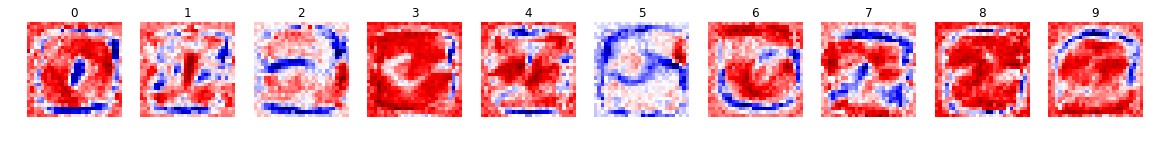

In [0]:
fig, axs = plt.subplots(1,10, figsize=(20,20))
weights = np.transpose(weights)
for i in range(10):
  subplot = axs[i]
  subplot.set_title(i)
  subplot.axis('off')
  # Modify me
  #print(weights)
  i_weights = np.expand_dims(weights[:,i], axis = 1) # Select the weights for the i'th output
  #print(i_weights.shape)
  img = np.reshape(i_weights, (28, 28)) # Reshape the weights into a 28x28 array
  subplot.imshow(img, plt.get_cmap('seismic'))
plt.show()

### 2b: Implement a deep neural network

**TODO**

Modify this code to create a deep neural network. Train your model using the code below, and compare the accuracy to the linear model above. 

Note: you do not need to modify any sections other than the model definition. 

The code below uses compiled versions of the training and evaluation loops (remove the ```@tf.function``` annotations if you need to debug).

In [0]:
class MyDNN(Model):
  def __init__(self):
    super(MyDNN, self).__init__()
    self.flatten = Flatten()
    # Modify me
    self.d1 = Dense(128, activation='relu')
    self.d2 = Dense(64, activation='relu')
    self.d3 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    x1 = self.d1(x)
    x2 = self.d2(x1)
    return self.d3(x2)

model = MyDNN()

In [0]:
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

These are helper functions we'll use to record loss and accuracy while your model is trained.

In [0]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

This method trains the model on a batch of data.

In [0]:
@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

This method evaluates the model on a batch of data.

In [0]:
@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)

Training and evaluation loop.

In [0]:
EPOCHS = 13

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.03395122289657593, Accuracy: 98.9000015258789, Test Loss: 0.08665478229522705, Test Accuracy: 97.63999938964844
Epoch 2, Loss: 0.026335323229432106, Accuracy: 99.1433334350586, Test Loss: 0.10825897753238678, Test Accuracy: 97.22000122070312
Epoch 3, Loss: 0.024286068975925446, Accuracy: 99.18000030517578, Test Loss: 0.12369119375944138, Test Accuracy: 97.01000213623047
Epoch 4, Loss: 0.0201126541942358, Accuracy: 99.33999633789062, Test Loss: 0.09286057204008102, Test Accuracy: 97.94999694824219
Epoch 5, Loss: 0.01916343905031681, Accuracy: 99.34832763671875, Test Loss: 0.10611391067504883, Test Accuracy: 97.50999450683594
Epoch 6, Loss: 0.015959635376930237, Accuracy: 99.45832824707031, Test Loss: 0.11859685182571411, Test Accuracy: 97.61000061035156
Epoch 7, Loss: 0.01511857844889164, Accuracy: 99.45999908447266, Test Loss: 0.11560781300067902, Test Accuracy: 97.5999984741211
Epoch 8, Loss: 0.014551263302564621, Accuracy: 99.50167083740234, Test Loss: 0.107655726373

Compare the accuracy:
epoch(13) and hidden layer are both equal to linear model above. And we can see the subclassed model's accuracy is higher than the linear model above from the epoch 1. But the results get closer in epoch 13.

### 2c: Provide your own implementation of softmax and use it to train a model

In your linear model above, the starter code looked similar to: 


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10, activation='softmax')

  def call(self, x):
    x = self.flatten(x)
    return self.d1(x)
``` 

Now, create a function:


```
def my_softmax(logits):
  # ...
```

and use it in your model as follows:


```
class LinearModel(Model):
  def __init__(self):
    super(LinearModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(10)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
``` 

Notice, we've removed the built-in activation method on the Dense layer, and added our own to the call method.

Tip: You can implement softmax first using NumPy, if you like, the gradually convert your code to use TensorFlow ops (which begin with tf.\* instead of np.\*).

Notes: 

- Your softmax implementation should be numerically stable. 
- You will need to use tf.* ops in order to use your code to train a model (TF cannot backprop through NumPy operations).

In [0]:
# TODO: your code here

def my_softmax(x):  
  # Modify me
    m1 = tf.exp(x-max(x))/sum(tf.exp(x-max(x)))
    return m1


class MyModel(Model):
  def __init__(self):
    super(MyModel, self).__init__()
    self.flatten = Flatten()
    self.d1 = Dense(128)

  def call(self, x):
    x = self.flatten(x)
    x = self.d1(x)
    return my_softmax(x)
  
model = MyModel()

# TODO
# Add code to train you model, your accuracy should be similar 
# to the linear model.
loss_object = tf.keras.losses.SparseCategoricalCrossentropy()
optimizer = tf.keras.optimizers.Adam()

train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.SparseCategoricalAccuracy(name='test_accuracy')

@tf.function
def train_step(images, labels):
  with tf.GradientTape() as tape:
    predictions = model(images)
    loss = loss_object(labels, predictions)
  gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))

  train_loss(loss)
  train_accuracy(labels, predictions)

@tf.function
def test_step(images, labels):
  predictions = model(images)
  t_loss = loss_object(labels, predictions)

  test_loss(t_loss)
  test_accuracy(labels, predictions)



EPOCHS = 15

for epoch in range(EPOCHS):
  for images, labels in train_ds:
    train_step(images, labels)

  for test_images, test_labels in test_ds:
    test_step(test_images, test_labels)

  template = 'Epoch {}, Loss: {}, Accuracy: {}, Test Loss: {}, Test Accuracy: {}'
  print(template.format(epoch+1,
                        train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))

  # Reset the metrics for the next epoch
  train_loss.reset_states()
  train_accuracy.reset_states()
  test_loss.reset_states()
  test_accuracy.reset_states()

Epoch 1, Loss: 0.5058115720748901, Accuracy: 87.60499572753906, Test Loss: 0.31665876507759094, Test Accuracy: 91.25999450683594
Epoch 2, Loss: 0.3119858205318451, Accuracy: 91.53500366210938, Test Loss: 0.29096296429634094, Test Accuracy: 91.82999420166016
Epoch 3, Loss: 0.29080474376678467, Accuracy: 92.09832763671875, Test Loss: 0.28167784214019775, Test Accuracy: 92.02999877929688
Epoch 4, Loss: 0.28087469935417175, Accuracy: 92.41667175292969, Test Loss: 0.27892598509788513, Test Accuracy: 92.2699966430664
Epoch 5, Loss: 0.27410316467285156, Accuracy: 92.6199951171875, Test Loss: 0.27347782254219055, Test Accuracy: 92.30999755859375
Epoch 6, Loss: 0.26933029294013977, Accuracy: 92.81500244140625, Test Loss: 0.27323365211486816, Test Accuracy: 92.3499984741211
Epoch 7, Loss: 0.2653310000896454, Accuracy: 92.86166381835938, Test Loss: 0.27386507391929626, Test Accuracy: 92.40999603271484
Epoch 8, Loss: 0.262702077627182, Accuracy: 92.961669921875, Test Loss: 0.2725283205509186, Test

In [0]:
# the loss is similar to the linear model